# Exploring Table Data
#### Jake Rowlnad and Paul Herz

## 1. Purpose
Paul and I decided to use the IMDb dataset. This dataset contains around 5000 movies from the International Movie Database. Movie tastes and rating vary widely from person to person and it can be very hard to recommend a movie to an individual. We wanted to explore, through visualization, what factors contribute to a well rated movie.

The IMDb dataset contains 28 different columns describing each movies. These range from the Movie Title to the Aspect Ratio, even contain the Number of faces that appear on the title poster, and Facebook statistics!

Our purpose is to visualize and draw conclusions between the many columns this dataset provides. Narrow down the important features and ensure that the data is both valid and meaningful.

-------------------------------------------------------------------

Dataset @ https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

Primary Question: What key features result in a well ranked movie?


## 2. Understanding the Data

### 2.1 Data Understanding

In [1]:
import pandas as pd

m = pd.read_csv('movie_metadata.csv')

# Reorder the DataFrame to a more intelligent fashion
m = m[[
    'movie_title','title_year',
    
    'genres', 'plot_keywords', 'duration',
    
    'budget', 'gross',
    
    'language', 'country', 'content_rating',
    
    'color', 'aspect_ratio',
    
    'facenumber_in_poster',
    
    'director_name',
    
    'actor_1_name', 'actor_2_name', 'actor_3_name',
    
    'movie_facebook_likes', 'director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes',
    'actor_3_facebook_likes', 'cast_total_facebook_likes',
    
    'movie_imdb_link', 'num_user_for_reviews', 'num_critic_for_reviews', 'num_voted_users',
    'imdb_score',
]]

# Reduce the number of float64 data types for columns that do not need a float64 data type
for col in ['title_year','facenumber_in_poster','movie_facebook_likes',
'actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes',
'cast_total_facebook_likes','num_user_for_reviews','num_critic_for_reviews',
'num_voted_users']:
    m[col] = pd.to_numeric(m[col],downcast='integer')
   
# Convet categorical values to category type
for col in ['language','country','content_rating','color','aspect_ratio']:
    m[col] = m[col].astype('category')
    
# Remove all duplicate entries
m.drop_duplicates(inplace=True)

# Create a copy to perserve the original DataFrame
m_original=m.copy()
m.head()

,movie_title,title_year,genres,plot_keywords,duration,budget,gross,language,country,content_rating,...,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_imdb_link,num_user_for_reviews,num_critic_for_reviews,num_voted_users,imdb_score
0,Avatar,2009.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,178.0,237000000.0,760505847.0,English,USA,PG-13,...,0.0,1000.0,936.0,855.0,4834,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,723.0,886204,7.9
1,Pirates of the Caribbean: At World's End,2007.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,169.0,300000000.0,309404152.0,English,USA,PG-13,...,563.0,40000.0,5000.0,1000.0,48350,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,302.0,471220,7.1
2,Spectre,2015.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,148.0,245000000.0,200074175.0,English,UK,PG-13,...,0.0,11000.0,393.0,161.0,11700,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,602.0,275868,6.8
3,The Dark Knight Rises,2012.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,164.0,250000000.0,448130642.0,English,USA,PG-13,...,22000.0,27000.0,23000.0,23000.0,106759,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,813.0,1144337,8.5
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,131.0,131.0,12.0,NaN,143,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,8,7.1


The major change here is generating the categorical data instead of string types for the columns: Language, Country, Content Rating, Color, and Aspect Ratio. We also reorder the columns for better readability and remove duplicate entries.

In [2]:
print("Maximum category with missing values has {0:.2f}% of its values missing before any inference or removals"
      .format((1 - m.count().min()/ len(m)) * 100))

Maximum category with missing values has 17.49% of its values missing before any inference or removals


On initial inspections, many fields have missing values, with one category missing the most at 17.53%. We wanted to modify our dataset in an attempt to have the most coverage of columns as we could. To begin with, we removed any foreign films. We noticed that both gross and budget were never standardized and gross was only collected as USA gross. A prime example is the film Princess Mononoke that had a budget of 2.4 billion Yen. Along with foreign films, we also removed the Movie Title, Actor 1's name, Actor 2's name, Actor 3's name, Plot Keywords and the IMDb Link. None of these features would be relevant in our analysis.

In [3]:
# Remove forgien films to solve the normalization problem
m = m[m['country'] == 'USA']

In [4]:
# Remove names except for the Director. 
#m.drop('movie_title', axis=1, inplace=True)
m.drop('plot_keywords', axis=1, inplace=True)
m.drop('actor_1_name', axis=1, inplace=True)
m.drop('actor_2_name', axis=1, inplace=True)
m.drop('actor_3_name', axis=1, inplace=True)
m.drop('movie_imdb_link', axis=1, inplace=True)

In [5]:
# [CITE] https://codedump.io/share/w8TDdH1LYgGt/1/format-certain-floating-dataframe-columns-into-percentage-in-pandas
nullPercents = m.isnull().sum()/m.count()
nullPercents.sort_values(inplace=True,ascending=False)
nullPercents = pd.Series([str(round(val*100, 2))+"%" for val in nullPercents], index = nullPercents.index)
nullPercents

gross                        17.61%
budget                        8.48%
aspect_ratio                  6.19%
content_rating                4.37%
director_facebook_likes       1.97%
title_year                    1.97%
director_name                 1.97%
num_critic_for_reviews        1.02%
color                         0.37%
num_user_for_reviews          0.35%
actor_3_facebook_likes        0.35%
facenumber_in_poster          0.32%
language                      0.27%
actor_2_facebook_likes        0.19%
duration                      0.16%
actor_1_facebook_likes        0.11%
genres                         0.0%
imdb_score                     0.0%
country                        0.0%
num_voted_users                0.0%
movie_facebook_likes           0.0%
cast_total_facebook_likes      0.0%
movie_title                    0.0%
dtype: object

Above is the per-column percentage of missing values. We decided to remove instead of imputing most of these values because, as you will see later, there is not much intra group similarity for these missing values.

### 2.2 Data Modification

To begin with title year, language, country, content rating, aspect ratio, duration, color, gross, and budget, are highly variable data points for each movie and are not imputable. Paul and I deiced to remove any row that had NaN values for these columns

In [6]:
for col in ['title_year', 'language','country','content_rating','aspect_ratio','duration', 'color','gross','budget']:
    m = m[pd.notnull(m[col])]

Social media presence was a major factor we wanted to look at as well. Social trends however can be very hard to predict so we deiced to remove any row that did not have complete Facebook data.

In [7]:
for col in ['movie_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes',
'actor_3_facebook_likes','cast_total_facebook_likes']:
    m = m[pd.notnull(m[col])]

Finally, the last major column that was missing a portion of its data was IMDb's own review numbers, and the number of faces present in the poster. Because this is an IMDb dataset, we believed that if no value was present for the number of users and critics that wrote reviews, then zero (0) users or critics reviewed that movie. For the number of faces present in the poster we took the average and rounded to the nearest whole number as our imputed value.

After removing these columns and rows, we wanted to bin the continuous IMDb score to be more meaningful. Our approach involved converting the score to a poor, average, or good ranking based on ranges in the IMDb score column. Instead of picking arbitrary IMBb scores to group by, we found the score values for the 50$^{th}$ percentile and the 90$^{th}$ percentile to group the movies by

In [8]:
for col in ['num_user_for_reviews','num_critic_for_reviews']:
    m[col].fillna(value=0,inplace=True)

avgFace = round(m['facenumber_in_poster'].mean())
m['facenumber_in_poster'].fillna(value=avgFace, inplace=True)

# [0%-49%] is Poor, [50%-89%] is Average, [90%-100%] is Good.
poor_avg = m['imdb_score'].quantile(.5)
avg_good = m['imdb_score'].quantile(.9)
m['rating_category'] = pd.cut(m.imdb_score,[0,poor_avg,avg_good,10],labels=['poor','average','good'])

# Seprately Groupby rating category
poor = m[m['rating_category'] == 'poor']
average =m[m['rating_category'] == 'average']
good = m[m['rating_category'] == 'good']

After removing rows with values that could not imputed, and filling in those that could, we have a complete data set of 22 columns with zero missing elements. While we unfortunately lost some of our original data, we now have a completely populated dataset with no missing values ready for visualization.

In [9]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2975 entries, 0 to 5042
Data columns (total 24 columns):
movie_title                  2975 non-null object
title_year                   2975 non-null float64
genres                       2975 non-null object
duration                     2975 non-null float64
budget                       2975 non-null float64
gross                        2975 non-null float64
language                     2975 non-null category
country                      2975 non-null category
content_rating               2975 non-null category
color                        2975 non-null category
aspect_ratio                 2975 non-null category
facenumber_in_poster         2975 non-null float64
director_name                2975 non-null object
movie_facebook_likes         2975 non-null int32
director_facebook_likes      2975 non-null float64
actor_1_facebook_likes       2975 non-null float64
actor_2_facebook_likes       2975 non-null float64
actor_3_facebook_likes    

## 3. Data Visualization

### 3.1 Data Exploration

In [10]:
import matplotlib
import matplotlib.pyplot as plt

#Make matplotlib pretty
matplotlib.rcParams.update({'figure.figsize': (10, 6)})
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'axes.labelsize': 20})
matplotlib.rcParams.update({'xtick.labelsize': 12})
matplotlib.rcParams.update({'ytick.labelsize': 12})
matplotlib.rcParams.update({'font.family': 'Helvetica, Arial, sans-serif'})

%config InlineBackend.figure_format = 'retina'

#### 3.1.1 Budget and Gross

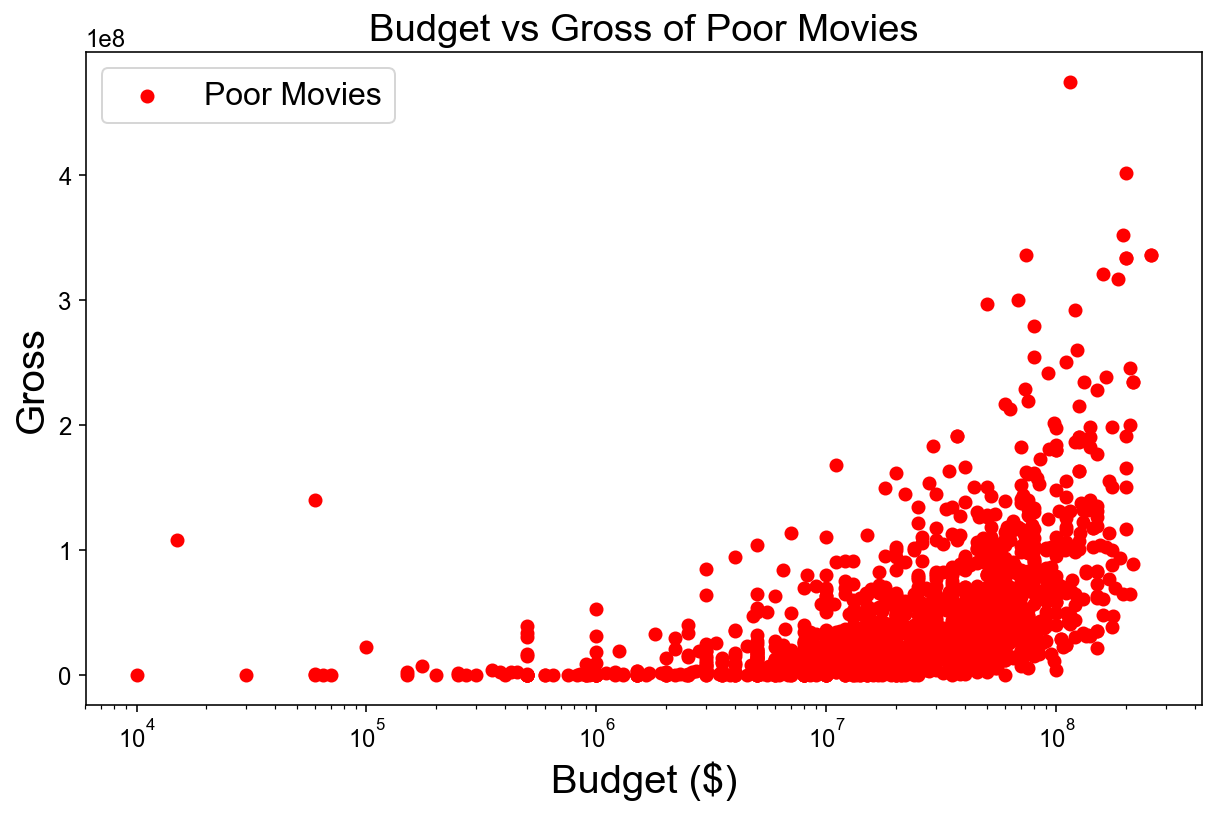

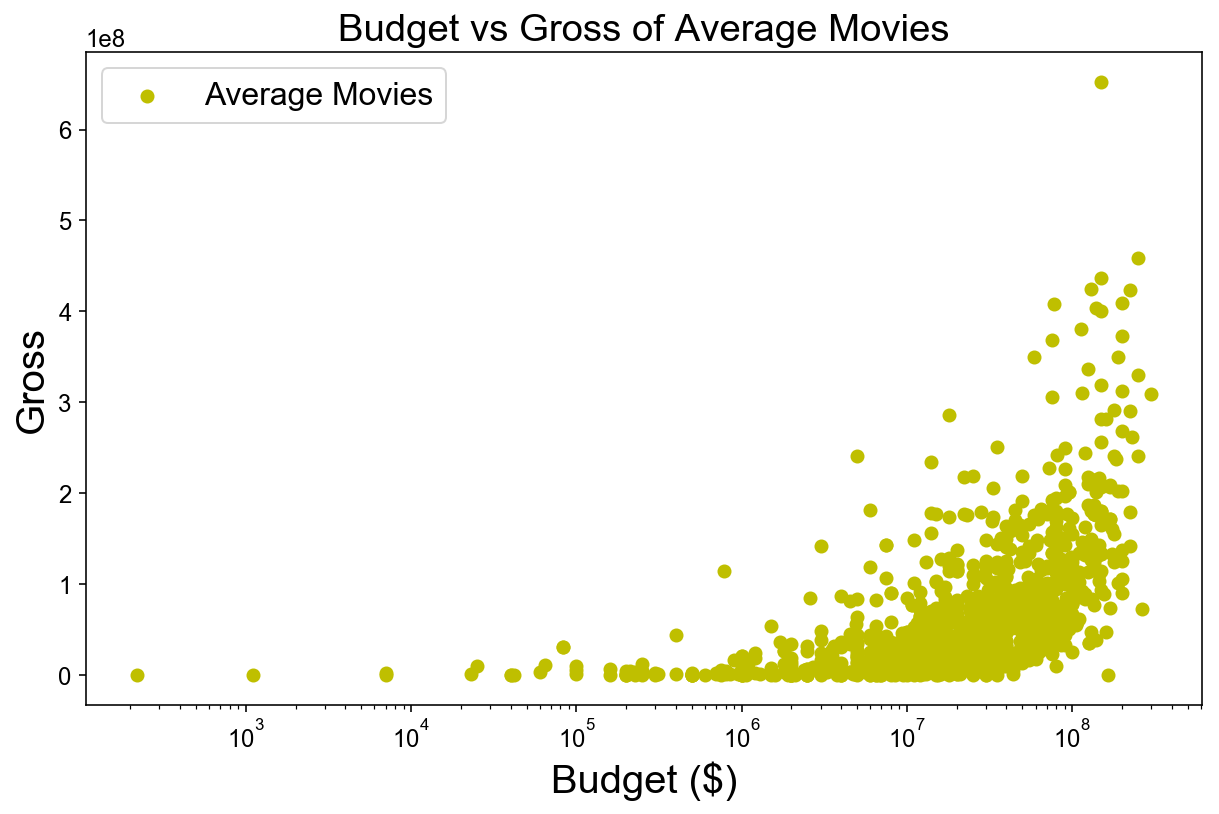

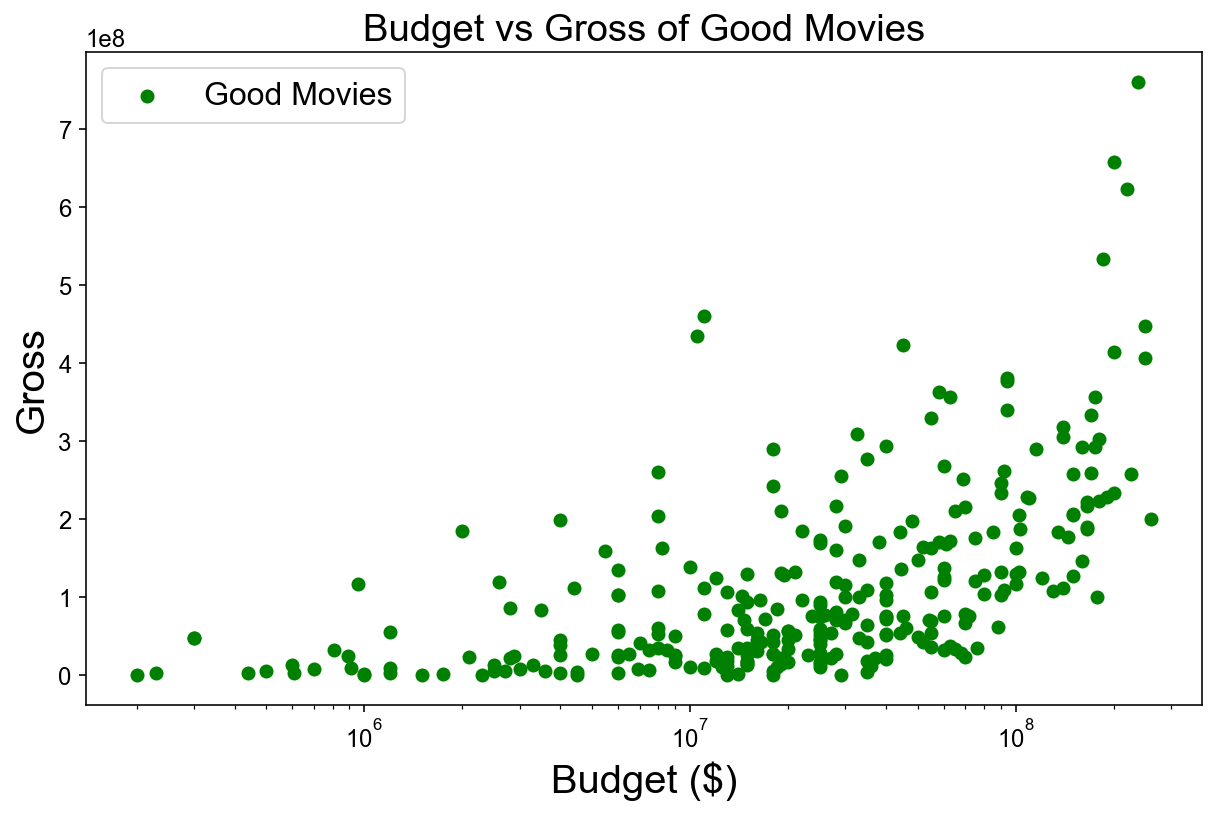

In [11]:
#Budget vs gross poor movies
plt.scatter(poor['budget'], poor['gross'], color='r', label='Poor Movies')
plt.title('Budget vs Gross of Poor Movies')
plt.xlabel('Budget ($)')
plt.ylabel('Gross')
plt.xscale('log')
plt.legend()
plt.show()

#Budget vs gross average movies
plt.scatter(average['budget'], average['gross'], color='y', label='Average Movies')
plt.title('Budget vs Gross of Average Movies')
plt.xlabel('Budget ($)')
plt.ylabel('Gross')
plt.xscale('log')
plt.legend()
plt.show()

#Budget vs gross good movies
plt.scatter(good['budget'], good['gross'], color='g', label='Good Movies')
plt.title('Budget vs Gross of Good Movies')
plt.xlabel('Budget ($)')
plt.ylabel('Gross')
plt.xscale('log')
plt.legend()
plt.show()

Our first initial thought was to look at how a movie's budget affected the movie's final Gross rate in the United States. There is a visible trend that a larger budget typically resulted in a larger gross. However, there are many movies in the poor and average groups that made very little money compared to their overall US gross. This is represented by the mass of points near the bottom right corner of the graphs. This mass is not present for well rated movies. 

Also, well rated movies, did not have to spend as much to generate a profit. There is a larger variety of ranges across the domain for good movies. In the poor and average movies, there is only the spike near the maximum budgeted films.

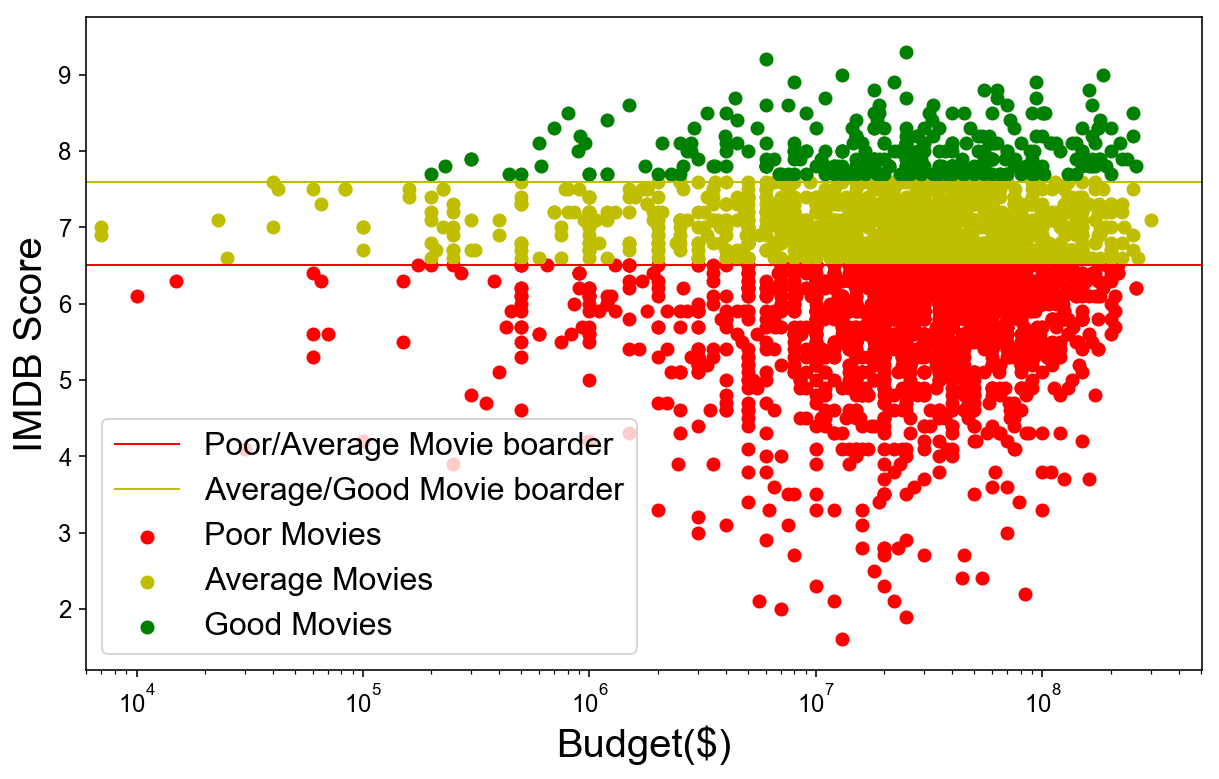

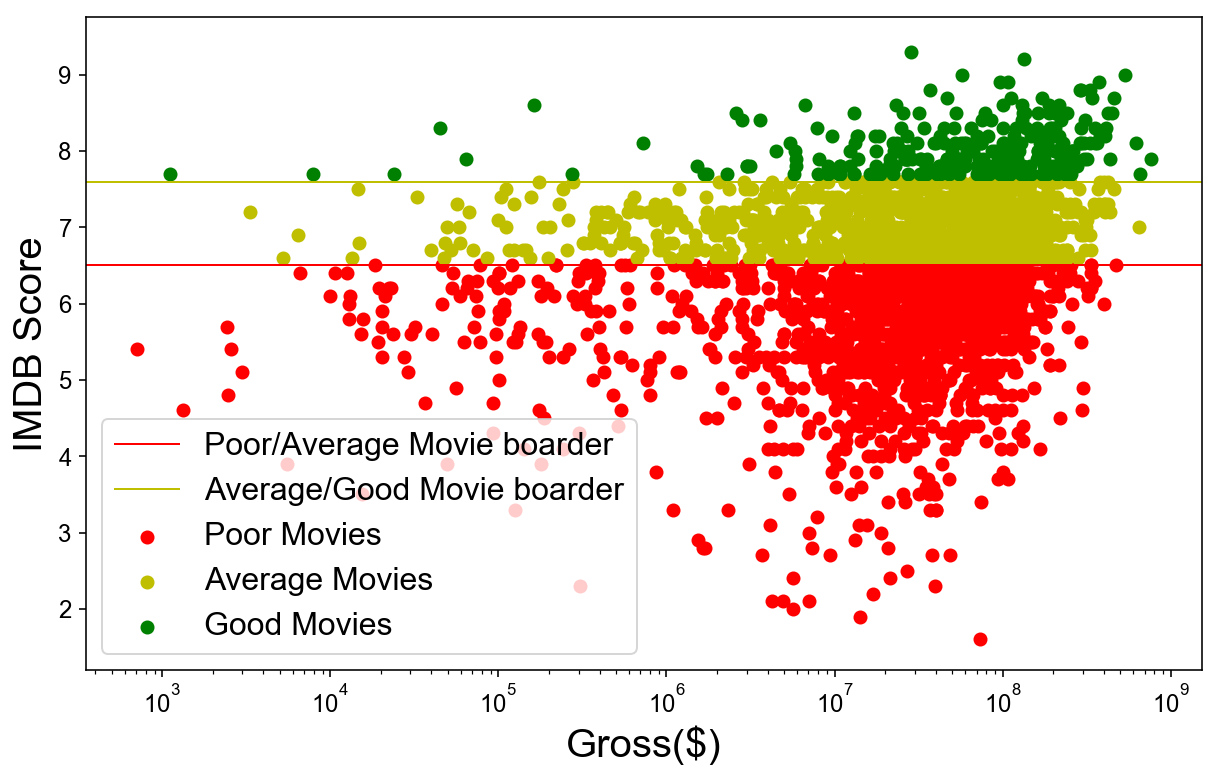

In [12]:
#Budget vs IMDb Score
plt.scatter(poor['budget'], poor['imdb_score'], color='r', label="Poor Movies")
plt.scatter(average['budget'], average['imdb_score'], color='y', label="Average Movies")
plt.scatter(good['budget'], good['imdb_score'], color='g', label="Good Movies")
plt.xlabel('Budget($)')
plt.ylabel('IMDB Score')
plt.xscale('log')
plt.axhline(y=poor_avg, linewidth=1, color = 'r', label="Poor/Average Movie boarder")
plt.axhline(y=avg_good, linewidth=1, color = 'y', label="Average/Good Movie boarder")
plt.legend()
plt.show()

#Gross vs IMDb Score
plt.scatter(poor['gross'], poor['imdb_score'], color='r', label="Poor Movies")
plt.scatter(average['gross'], average['imdb_score'], color='y', label="Average Movies")
plt.scatter(good['gross'], good['imdb_score'], color='g', label="Good Movies")
plt.xlabel('Gross($)')
plt.ylabel('IMDB Score')
plt.xscale('log')
plt.axhline(y=poor_avg, linewidth=1, color = 'r', label="Poor/Average Movie boarder")
plt.axhline(y=avg_good, linewidth=1, color = 'y', label="Average/Good Movie boarder")
plt.legend()
plt.show()

Surprisingly, as far as budget goes, the vast majority of movies rage between \$$10^7$ and \$$10^8$  regardless of rating. Budget alone cannot accurately predict a movies response. With some \$10,000,000 and \$100,000,000 movies getting ratings well below a 5.

Gross on the other hand has some noticeable trends. Based on the shape of the poor movies starting around \$$10^7$ there is a definite upward trend that extends throughout the good movies about half way between \$$10^8$, and \$$10^9$. This clearly shows that a higher gross can be predictive quality of a good movie.

The trend revealed in the Gross graph is examined in more detail further down.

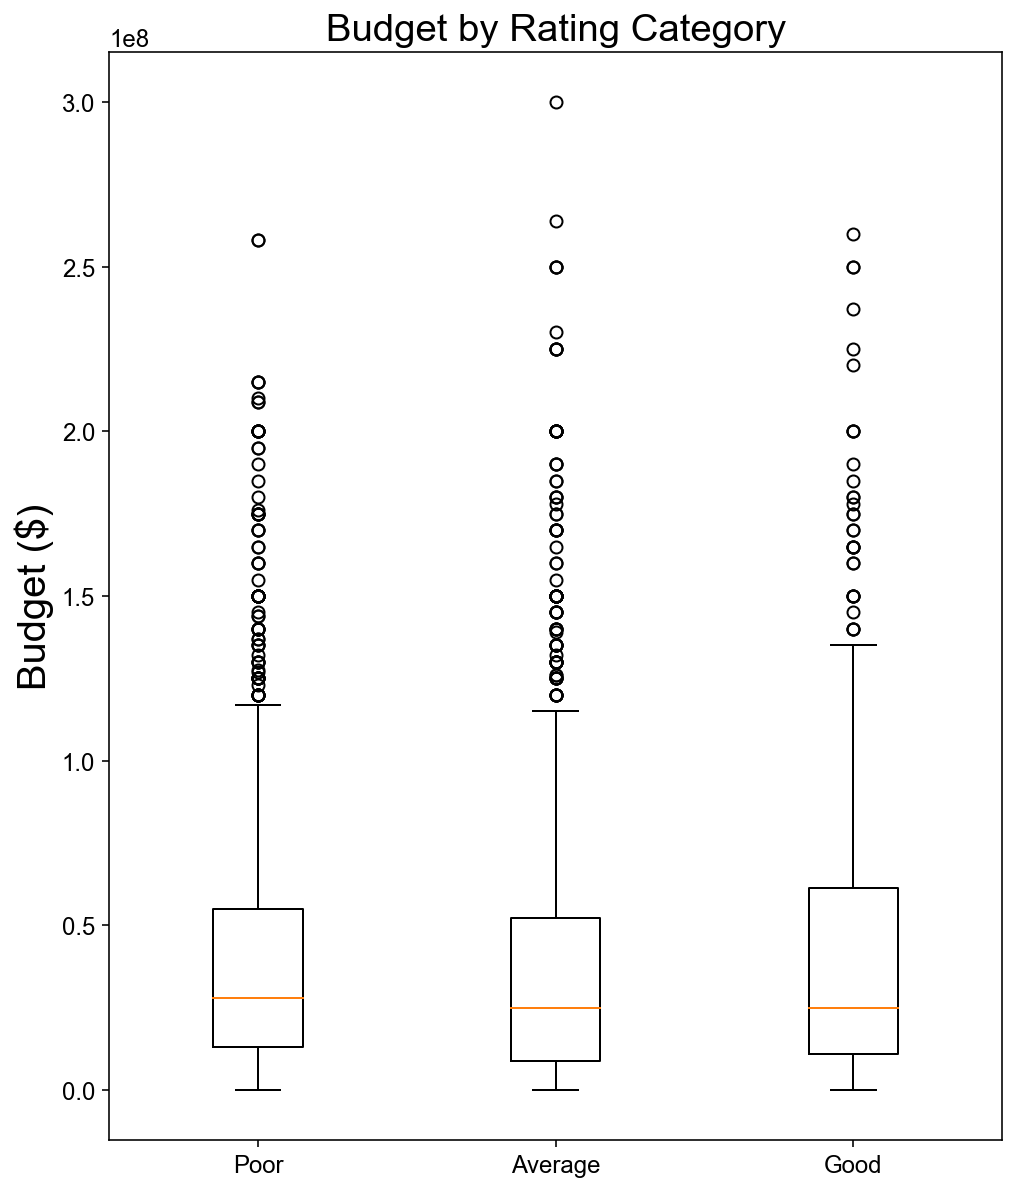

In [13]:
dataset = [poor['budget'],average['budget'],good['budget']]

#Box plot based on budget
plt.figure(figsize=(8,10))
plt.boxplot(dataset, labels=['Poor','Average','Good'])
plt.title('Budget by Rating Category')
plt.ylabel('Budget ($)')
plt.show()

Now with the rating category visualized separately, some similarities appear between the different bins. Most remarkable is the similarity between the bottom 50% of movies based on budget. All three categories are quite similar. The similarities continue although not as pronounced as the graph continues. Poor and Average are almost the same graph with only slight variations and outliers. Good seems to be the only one that spreads out more after the 50% mark reaching the 75% a few quarters of a point above the others and has the upper most whisker almost .5 points above the poor and average movie's whiskers.

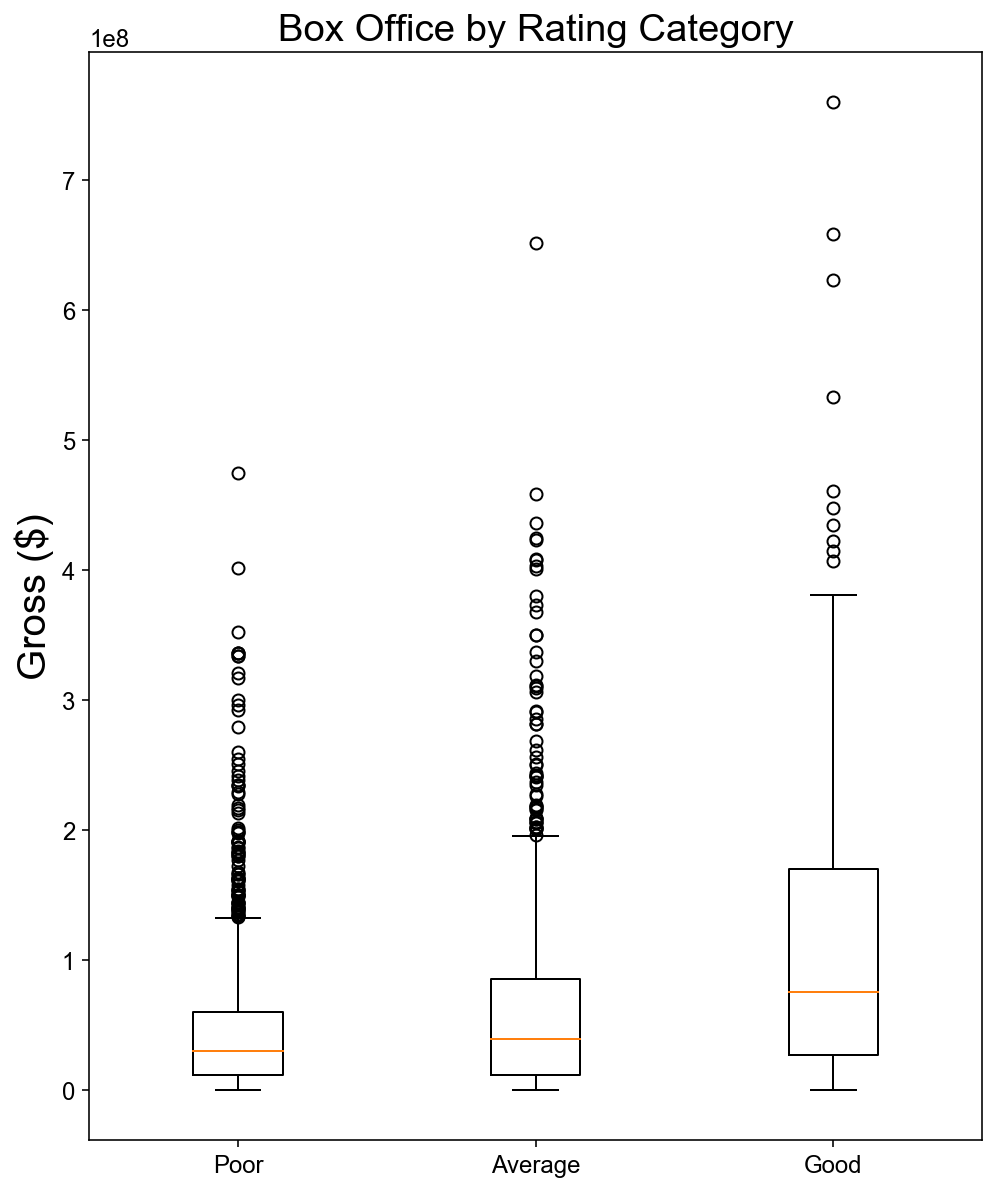

In [14]:
dataset = [poor['gross'],average['gross'],good['gross']]

plt.figure(figsize=(8,10))
plt.boxplot(dataset, labels=['Poor','Average','Good'])
plt.title('Box Office by Rating Category')
plt.ylabel('Gross ($)')
plt.show()

Initially obvious is the wide large variance in Gross between poor and good movies. The average gross for good movies well exceeds the 75$^{th}$ percentile for poor movies. Also, the good movie's uppermost whisker almost completely exceeds all of the outliers for both the poor and average movies.

This graph has indications that movie profit is relatively merit based. Movies that perform well in the market are generally better movies.

This graph shows that, unlike budget, gross is possible factor towards IMDb's rating.

#### 3.1.2 Duration

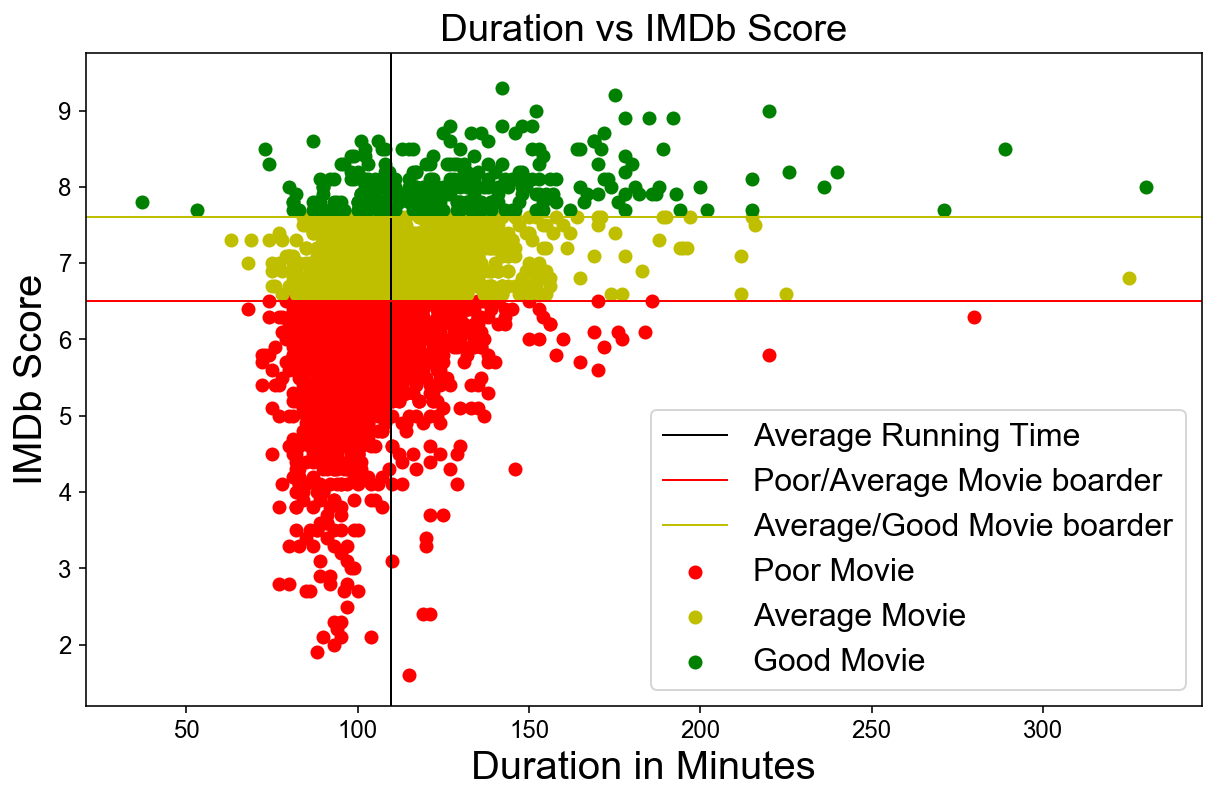

In [15]:
plt.scatter(poor['duration'],poor['imdb_score'], color='r', label='Poor Movie')
plt.scatter(average['duration'],average['imdb_score'], color='y', label='Average Movie')
plt.scatter(good['duration'],good['imdb_score'], color='g', label='Good Movie')
plt.title("Duration vs IMDb Score")
plt.xlabel("Duration in Minutes")
plt.ylabel("IMDb Score")
plt.axvline(m['duration'].mean(), linewidth=1, color='k', label='Average Running Time')
plt.axhline(y=poor_avg, linewidth=1, color = 'r', label="Poor/Average Movie boarder")
plt.axhline(y=avg_good, linewidth=1, color = 'y', label="Average/Good Movie boarder")
plt.legend()
plt.show()

Another major relation we desired to look at was whether, movie length had any effect on IMDb score. Surprisingly there seems to be some correlation between movie length and IMDb score. The movies seem to be locked into a triangle starting around (90,2) to (90,8.5) and (160, 8.5). This seems to show that poor movies have a much tighter cluster of durations then average and good movies. In fact, hardly any poor movies attempt to break out of the triangle, with many 4 and below rated movies having durations below the average running time. 

The opposite happens when focusing on the good movies. The lines of the triangle are much less defined and this group has a much larger portion of movies outside the 150-minute mark.

#### 3.1.3 Facebook statistics

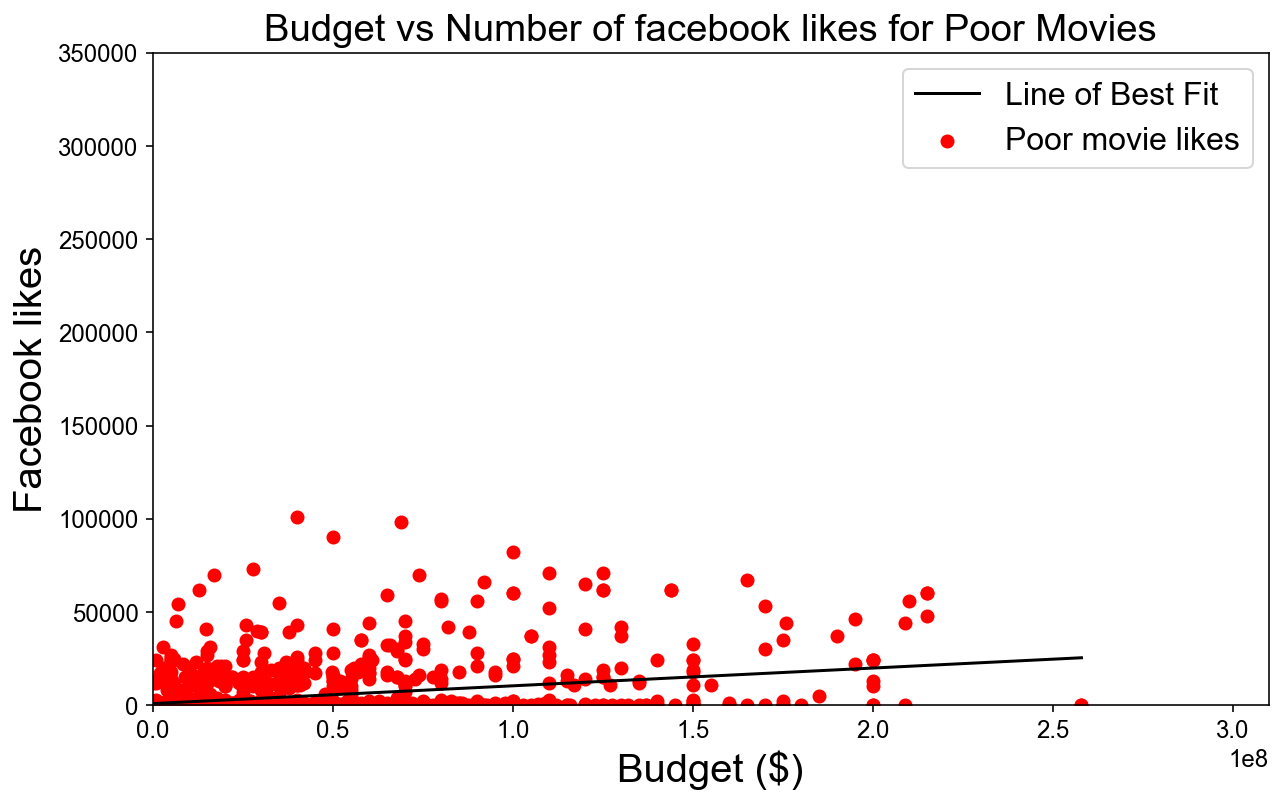

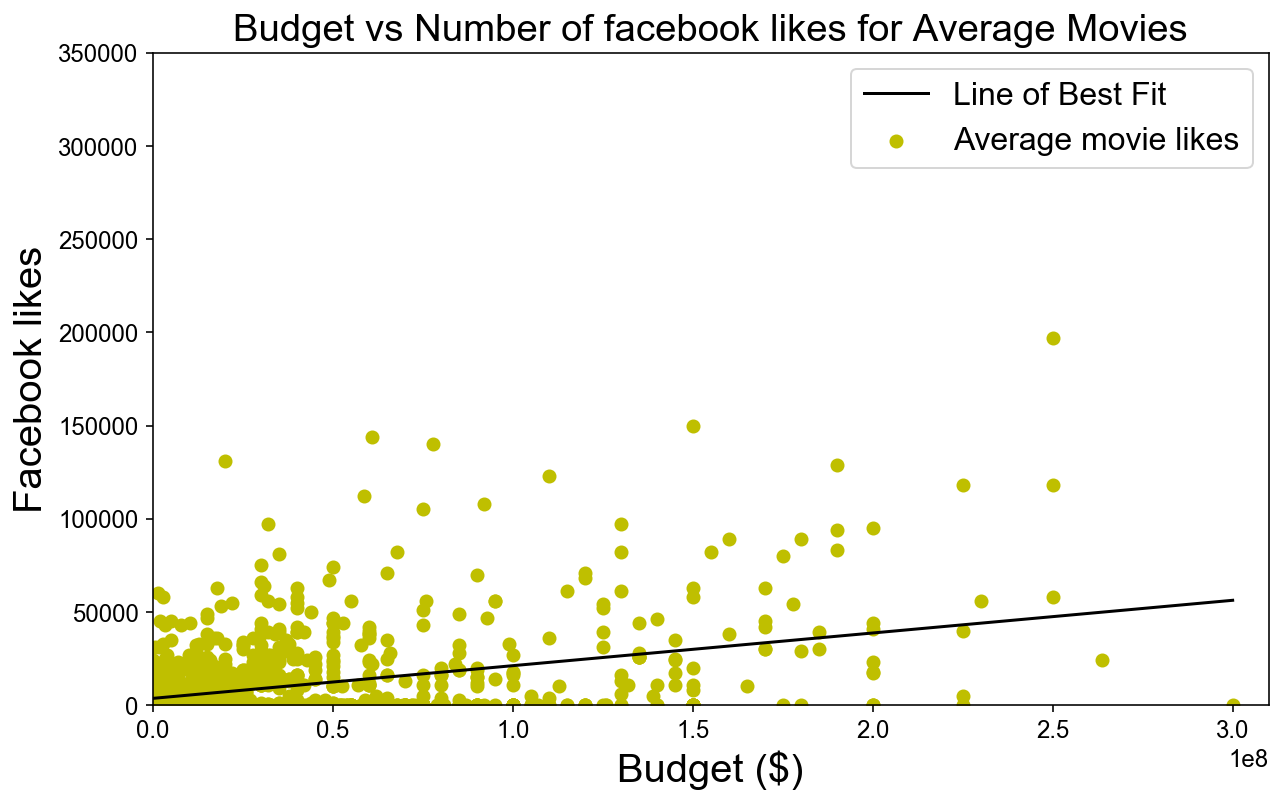

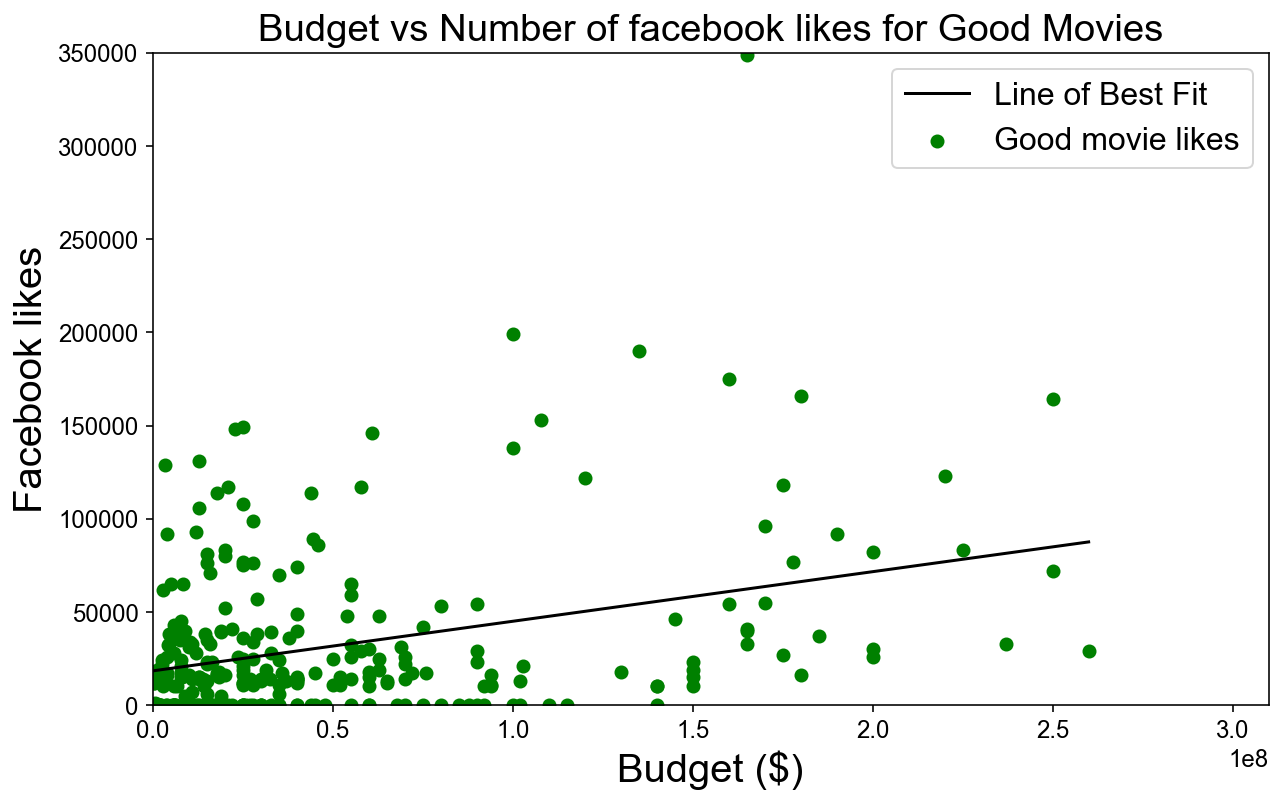

In [16]:
import numpy as np

plt.scatter(poor['budget'],poor['movie_facebook_likes'], color='r', label="Poor movie likes")
plt.title("Budget vs Number of facebook likes for Poor Movies")
plt.xlabel("Budget ($)")
plt.ylabel("Facebook likes")
plt.xlim(0, 3.1e8)
plt.ylim(0, 350000)
plt.plot(np.unique(poor['budget']), np.poly1d(np.polyfit(poor['budget'], poor['movie_facebook_likes'], 1))
        (np.unique(poor['budget'])), color='k', label='Line of Best Fit')
plt.legend()
plt.show()

plt.scatter(average['budget'],average['movie_facebook_likes'], color='y', label="Average movie likes")
plt.title("Budget vs Number of facebook likes for Average Movies")
plt.xlabel("Budget ($)")
plt.ylabel("Facebook likes")
plt.xlim(0, 3.1e8)
plt.ylim(0, 350000)
plt.plot(np.unique(average['budget']), np.poly1d(np.polyfit(average['budget'], average['movie_facebook_likes'], 1))
        (np.unique(average['budget'])), color='k', label='Line of Best Fit')
plt.legend()
plt.show()

plt.scatter(good['budget'],good['movie_facebook_likes'], color='g', label="Good movie likes")
plt.title("Budget vs Number of facebook likes for Good Movies")
plt.xlabel("Budget ($)")
plt.ylabel("Facebook likes")
plt.xlim(0, 3.1e8)
plt.ylim(0, 350000)
plt.plot(np.unique(good['budget']), np.poly1d(np.polyfit(good['budget'], good['movie_facebook_likes'], 1))
        (np.unique(good['budget'])), color='k', label='Line of Best Fit')
plt.legend()
plt.show()

From the boxplot above describing movie rating vs budget, Paul and I, did not expect to see such a variance when relating Budget to Facebook likes. However, we were proven wrong when we saw the difference in correlation from poor movies to good movies. There is a much more positive correlation between budget and Facebook likes for good movies then for poor or average. Also, there does not seem to be as many good movies clustered near the origin.

We also wanted to understand why higher budget movies receive more Facebook likes. Even poor movies have a small positive correlation as budget goes up. In our experience, big budget movies tend to have a very large marketing budget. This budget allows for commercials and socail media promoting for the movie. As the total budget would increase, so would marketing. This trend would expose more individuals to the movie and it's Facebook page resulting in more likes.

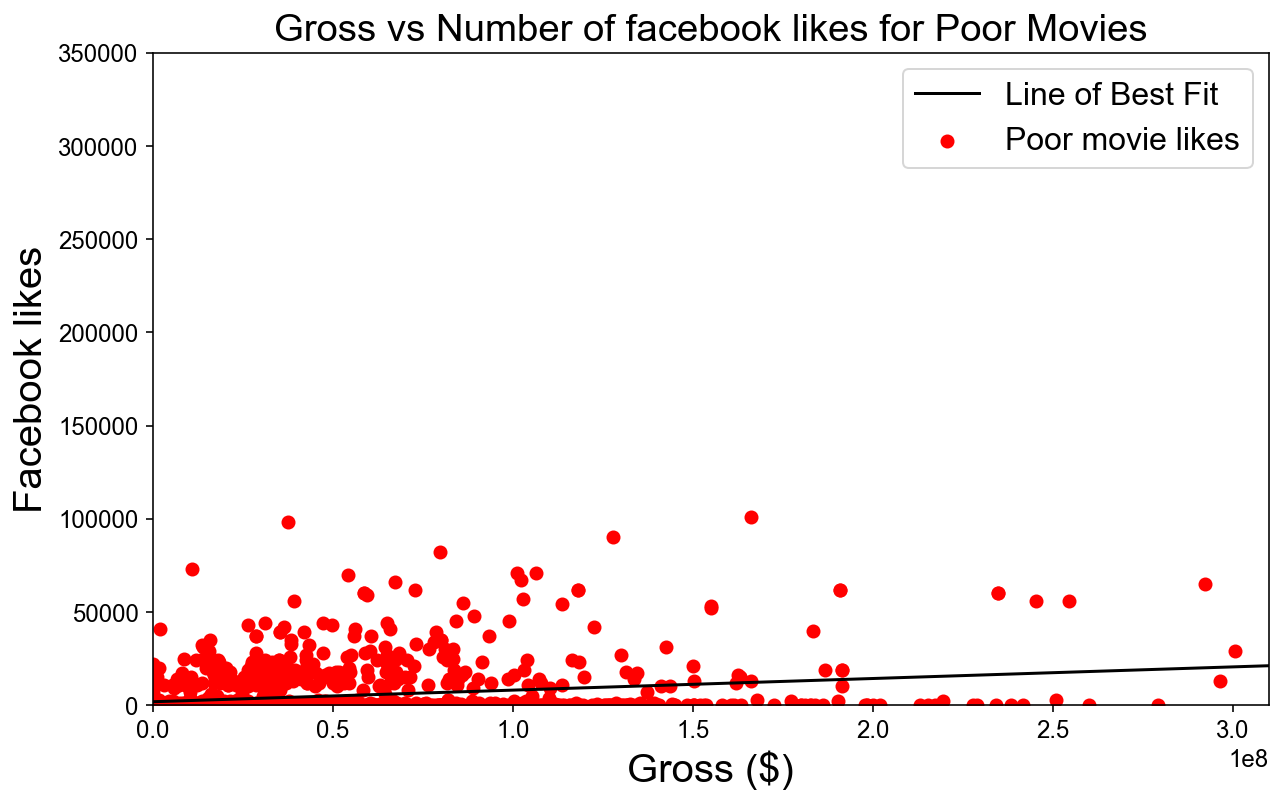

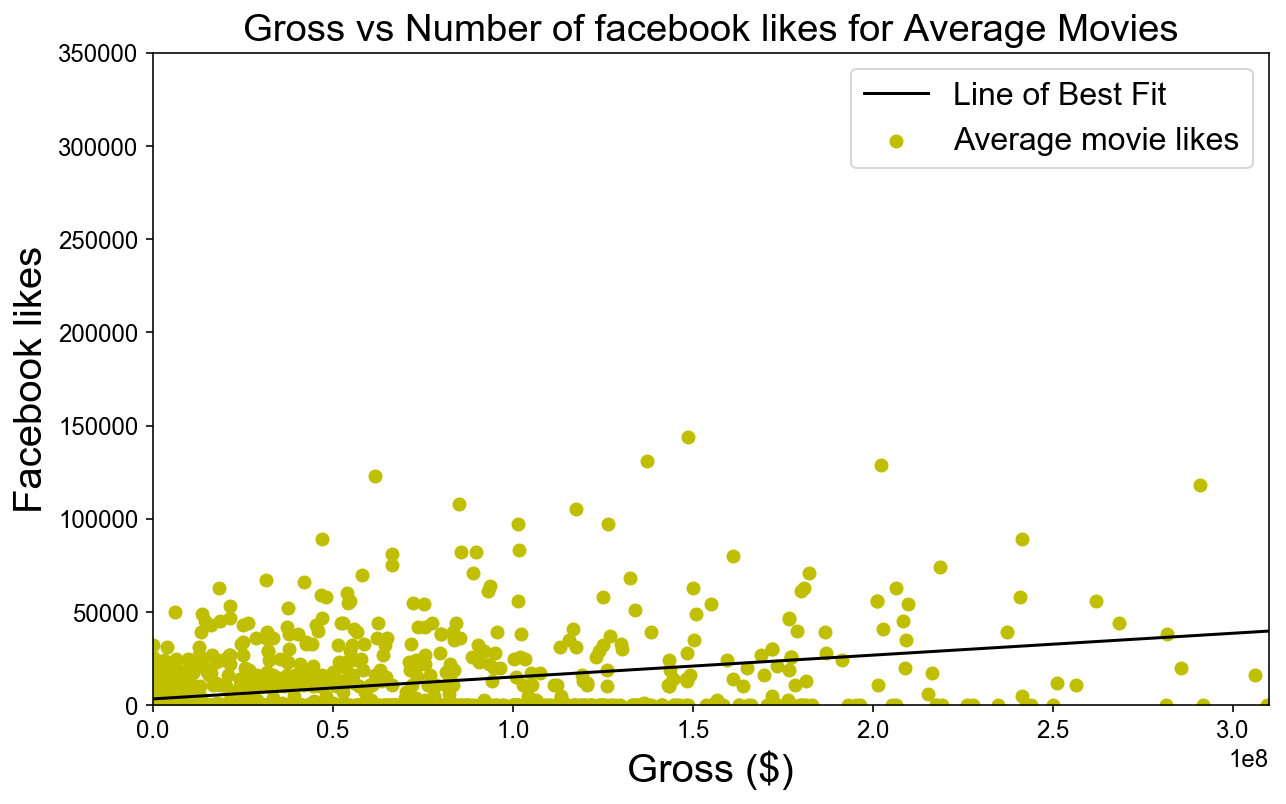

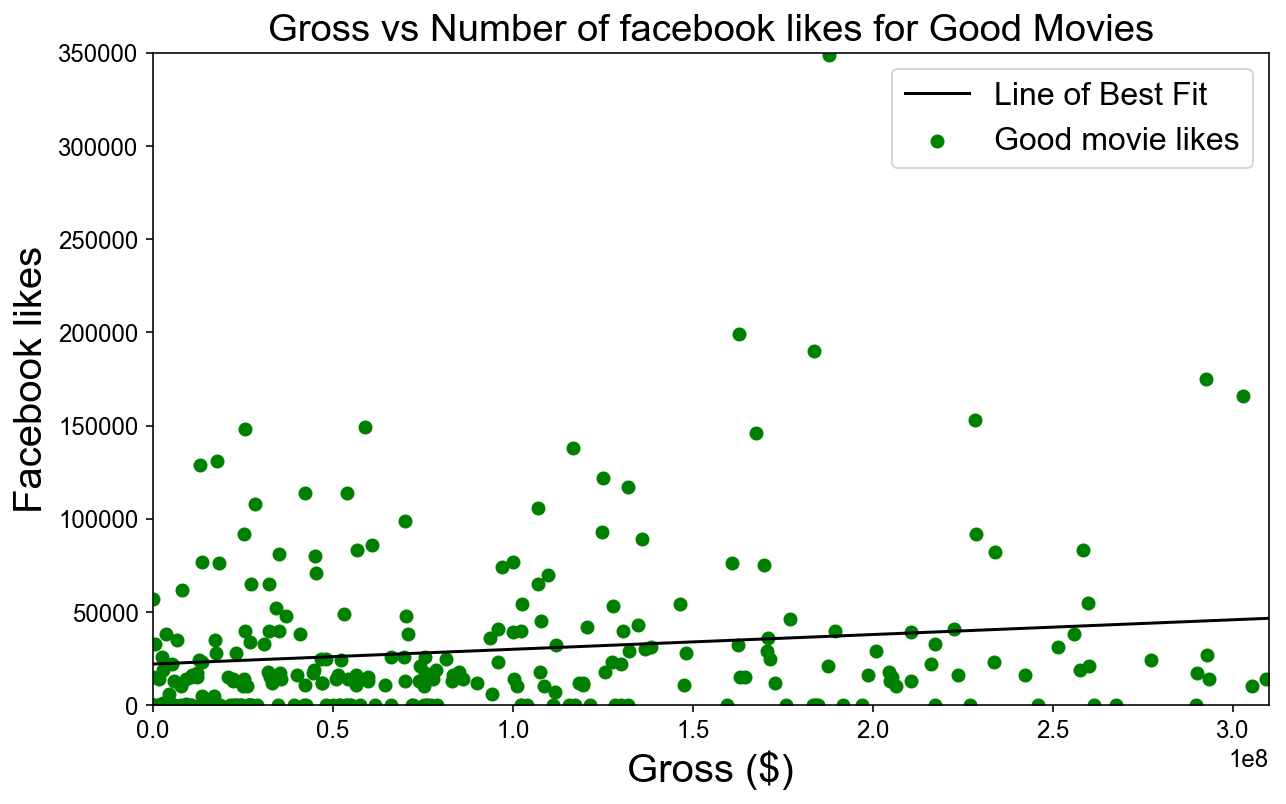

In [17]:
plt.scatter(poor['gross'],poor['movie_facebook_likes'], color='r', label="Poor movie likes")
plt.title("Gross vs Number of facebook likes for Poor Movies")
plt.xlabel("Gross ($)")
plt.ylabel("Facebook likes")
plt.xlim(0, 3.1e8)
plt.ylim(0, 350000)
plt.plot(np.unique(poor['gross']), np.poly1d(np.polyfit(poor['gross'], poor['movie_facebook_likes'], 1))
        (np.unique(poor['gross'])), color='k', label='Line of Best Fit')
plt.legend()
plt.show()

plt.scatter(average['gross'],average['movie_facebook_likes'], color='y', label="Average movie likes")
plt.title("Gross vs Number of facebook likes for Average Movies")
plt.xlabel("Gross ($)")
plt.ylabel("Facebook likes")
plt.xlim(0, 3.1e8)
plt.ylim(0, 350000)
plt.plot(np.unique(average['gross']), np.poly1d(np.polyfit(average['gross'], average['movie_facebook_likes'], 1))
        (np.unique(average['gross'])), color='k', label='Line of Best Fit')
plt.legend()
plt.show()

plt.scatter(good['gross'],good['movie_facebook_likes'], color='g', label="Good movie likes")
plt.title("Gross vs Number of facebook likes for Good Movies")
plt.xlabel("Gross ($)")
plt.ylabel("Facebook likes")
plt.xlim(0, 3.1e8)
plt.ylim(0, 350000)
plt.plot(np.unique(good['gross']), np.poly1d(np.polyfit(good['gross'], good['movie_facebook_likes'], 1))
        (np.unique(good['gross'])), color='k', label='Line of Best Fit')
plt.legend()
plt.show()

With a Facebook Like estimate from Budget, Paul and I, also decided to look at the effect Gross had on Facebook Likes. The graphs and line of best fit are surprisingly similar. I was most impressed that there seems to be a constant rate of change throughout all three graphs. The only differing factor was the height above the x-axis.

Poor and average movies both had a line that was much closer to the axis then good movies. However, they both seem to raise at nearly the same rate.

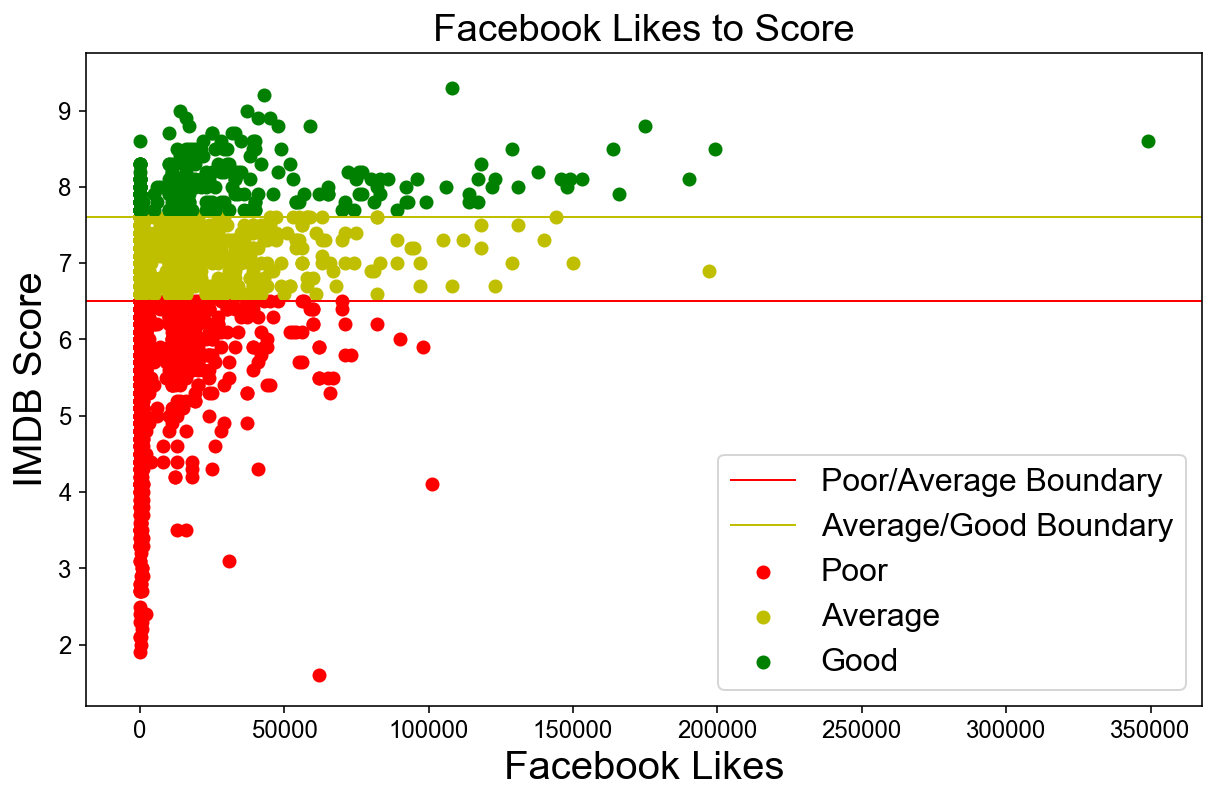

In [18]:
plt.scatter(poor['movie_facebook_likes'], poor['imdb_score'], color='r' , label='Poor')
plt.scatter(average['movie_facebook_likes'], average['imdb_score'], color='y' , label='Average')
plt.scatter(good['movie_facebook_likes'], good['imdb_score'], color='g', label='Good')
plt.title('Facebook Likes to Score')
plt.xlabel('Facebook Likes')
plt.ylabel('IMDB Score')
plt.axhline(y=poor_avg, linewidth=1, color = 'r', label='Poor/Average Boundary')
plt.axhline(y=avg_good, linewidth=1, color = 'y', label='Average/Good Boundary')
plt.legend()
plt.show()

The combined Facebook like vs IMDb Score graph shows some interesting features. As far as variance, as score increases there is much more movies that have high number of likes. Almost all movies below a 4.5 have zero Facebook likes. Above 4.5, there is a clump that extends to about 50,000 Facebook likes regardless of poor, average or good ranking. However, no poor movie receives more than about 100,000 Facebook likes. Average and Good greatly exceed that going to up to 200,000 with an extreme case at 350,000 Facebook likes

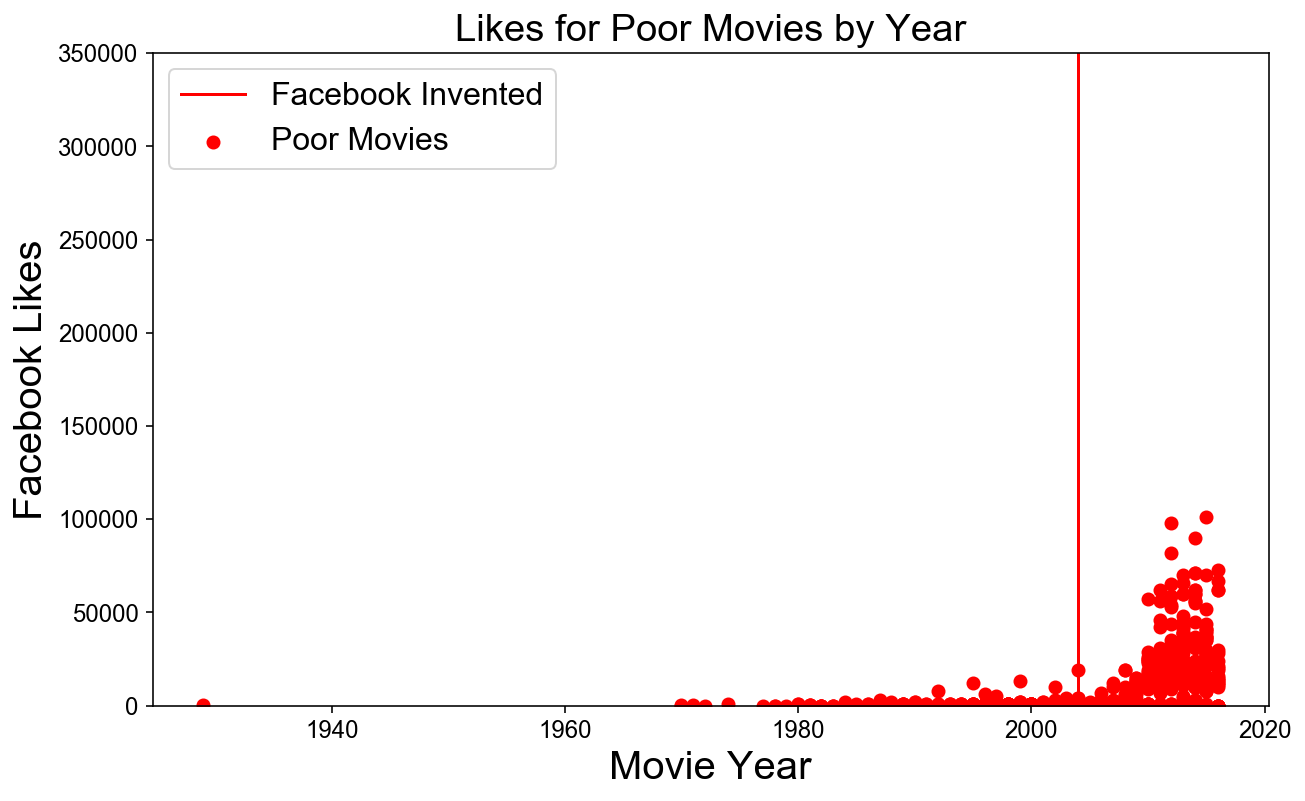

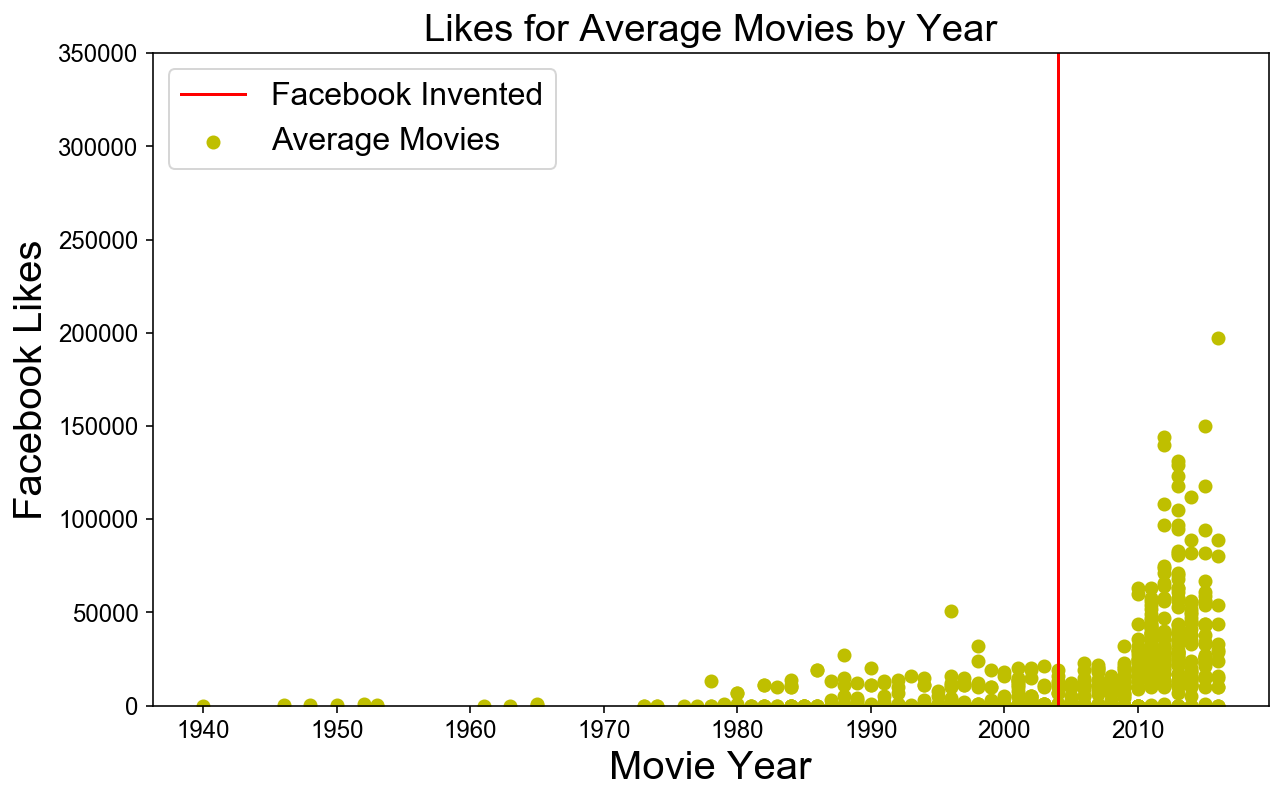

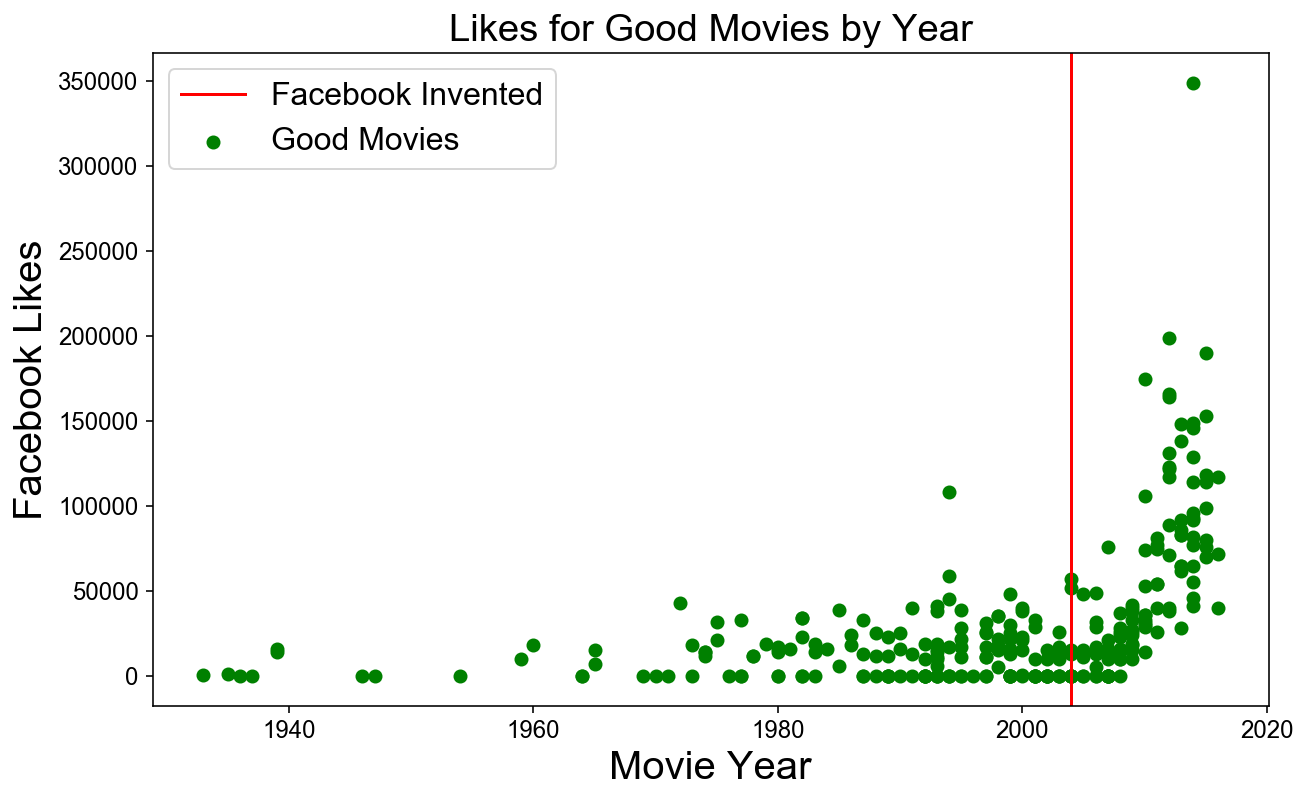

In [19]:
plt.scatter(poor['title_year'],poor['movie_facebook_likes'], color='r', label="Poor Movies")
plt.xlabel('Movie Year')
plt.ylabel('Facebook Likes')
plt.ylim(0,350000)
plt.title('Likes for Poor Movies by Year')
fbLine = plt.axvline(x=2004,color='red', label="Facebook Invented")
plt.legend()
plt.show()

plt.scatter(average['title_year'],average['movie_facebook_likes'], color='y', label="Average Movies")
plt.xlabel('Movie Year')
plt.ylabel('Facebook Likes')
plt.ylim(0,350000)
plt.title('Likes for Average Movies by Year')
fbLine = plt.axvline(x=2004,color='red', label="Facebook Invented")
plt.legend()
plt.show()

plt.scatter(good['title_year'],good['movie_facebook_likes'], color='g', label="Good Movies")
plt.xlabel('Movie Year')
plt.ylabel('Facebook Likes')
plt.title('Likes for Good Movies by Year')
fbLine = plt.axvline(x=2004,color='red', label="Facebook Invented")
plt.legend()
plt.show()

With Facebook officially created in 2004, it is surprising to see so many movies that were released before 2004 to have Facebook likes. Further examination revealed that, movies with retroactive Facebook pages, have significantly less likes then movies released after Facebook. 

Good movies still outclass average and poor movies when examining pre-2004 movies. Pre-2004 poor movies have almost no likes with the best of them having less then 20,000. Good on the other hand range from around 25,000, to just over 100,000 likes.

Finally, on all three graphs, there is a sudden jump in the number of Facebook likes starting around the years 2008-2010. This sudden increase can be attributed to the rise of popularity of Facebook during those years, and the usage of Facebook as a marketing tool. Exposing more potential viewers through the use of social media. However, even with the spike visible in all three graphs, good movies have a much higher peak then poor or average rated movies.

#### 3.1.4 Directors

In [20]:
# Capture all movies by all directors of specific prolificness (Number of movies to their name)
films_by_prolific={}
for name,score in m['director_name'].value_counts().iteritems():
    movies_by_director = m[m['director_name']==name]
    if score not in films_by_prolific:
        films_by_prolific[score] = movies_by_director.copy()
    else:
        films_by_prolific[score] = pd.concat([films_by_prolific[score], movies_by_director], ignore_index=True)
        
keyList = list(films_by_prolific.keys())
meanList = [df['gross'].mean() for df in films_by_prolific.values()]

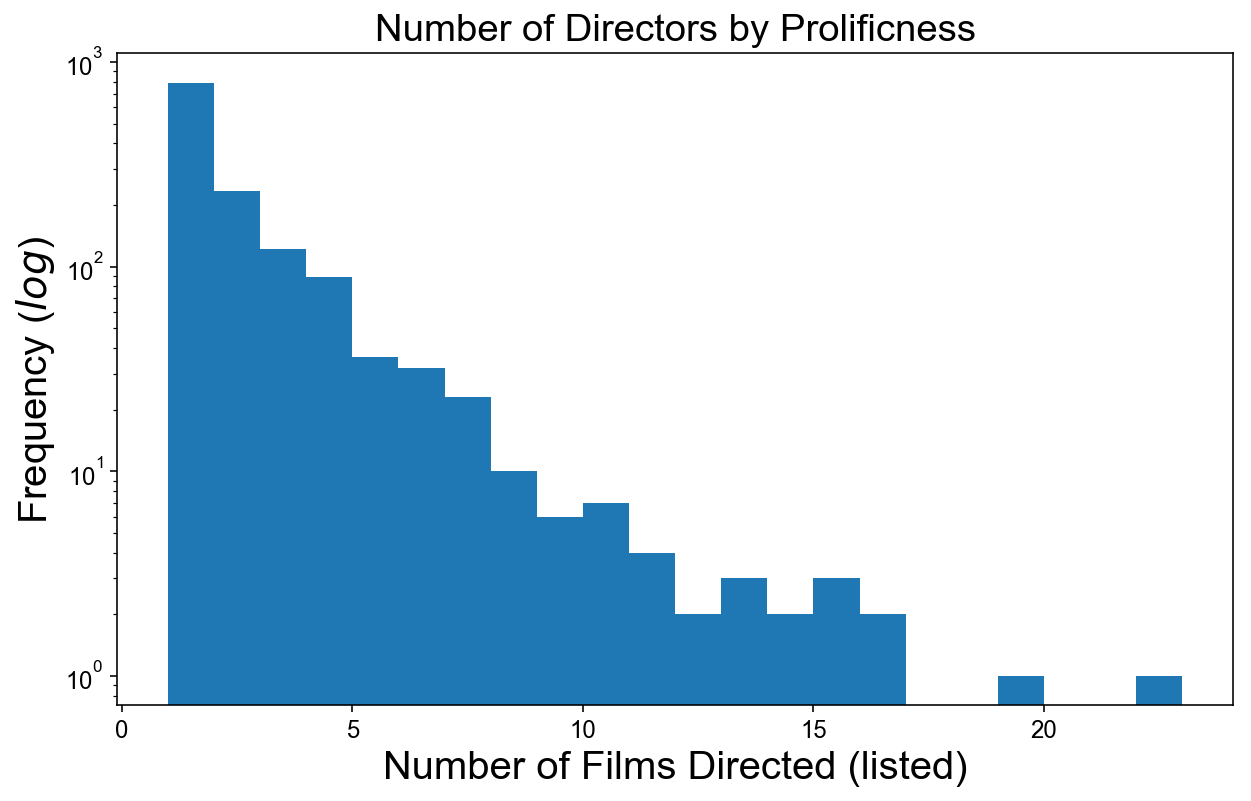

In [21]:
# Number of directors who direct a certain number of movies on the list
# "How prolific are the directors?"
dc=m['director_name'].value_counts().value_counts().index
dr=abs(dc.max()-dc.min())

plt.hist(m['director_name'].value_counts(),bins=dr)
plt.yscale('log')
plt.title('Number of Directors by Prolificness')
plt.xlabel('Number of Films Directed (listed)')
plt.ylabel('Frequency ($log$)')
plt.show()

With so many movies, Paul and I, decided to look for prolific directors. We wanted to see if a more well-known director performs better than one that is less well known.

As one expects, as the number of films a director directs increases, there becomes less directors that have directed that many movies. There is also a very sharp decline between 1 movie directed and 8 movies directed. Going from about 1000 directors to only 10 directors with that may movies.

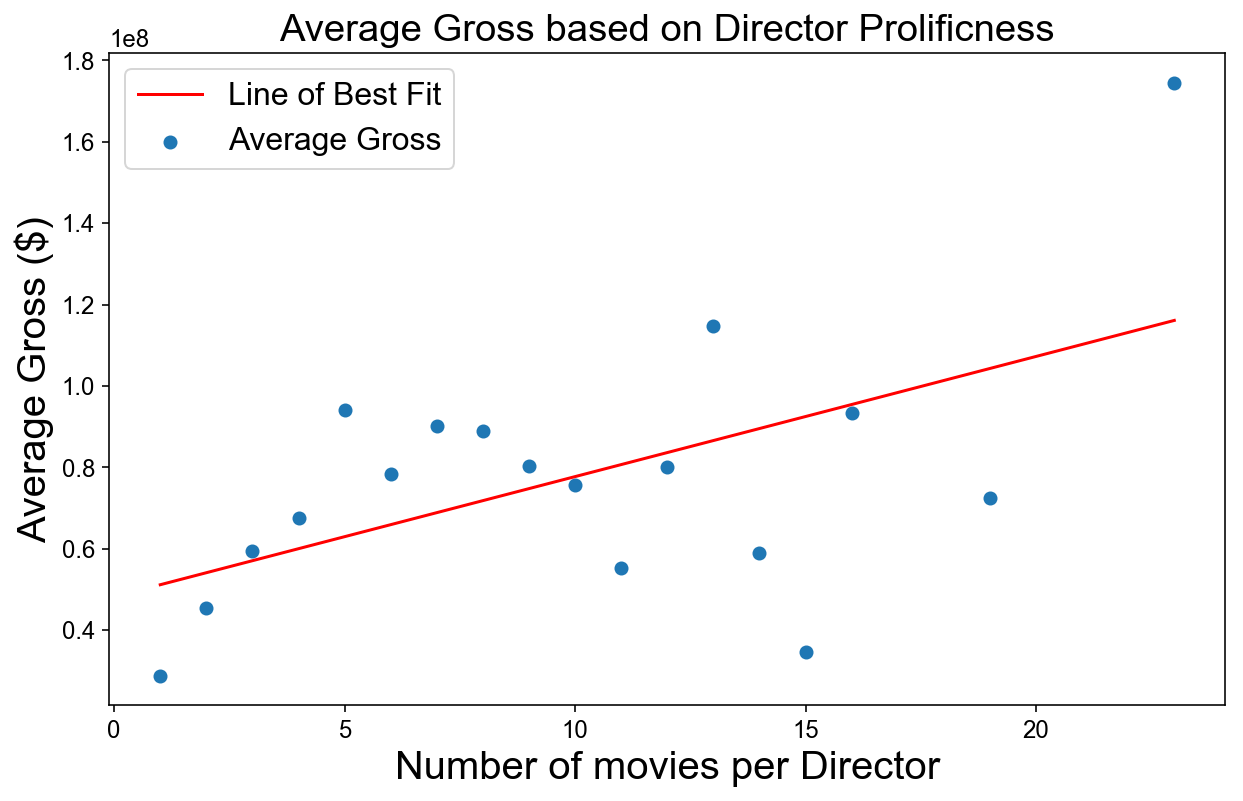

In [22]:
plt.scatter(keyList, meanList, label='Average Gross')
plt.plot(np.unique(keyList), np.poly1d(np.polyfit(keyList, meanList, 1))
        (np.unique(keyList)), color='r', label='Line of Best Fit')
plt.xlabel('Number of movies per Director')
plt.ylabel('Average Gross ($)')
plt.title('Average Gross based on Director Prolificness')
plt.legend()
plt.show()

Paul and I decided to relate experience to Average Gross. Our metric for experience is based on the number of movies a director had directed only, we do not consider the time spend on movies or years working in the industry. The line of best fit clearly shows that more experienced directors generate more money. However, there also seems to be a downward trend starting around 5 movies and continuing on to 15 movies.

I attribute the drop seen between 5 movies directed and 15 to the sudden lack of directors that direct that many movies (see histogram above). Because there are around 1000 directors that only directed one movie. The average is much more stable to outliers. However, when you get between 12 and 3 directors per bucket. One bad movie can drastically effect the average.

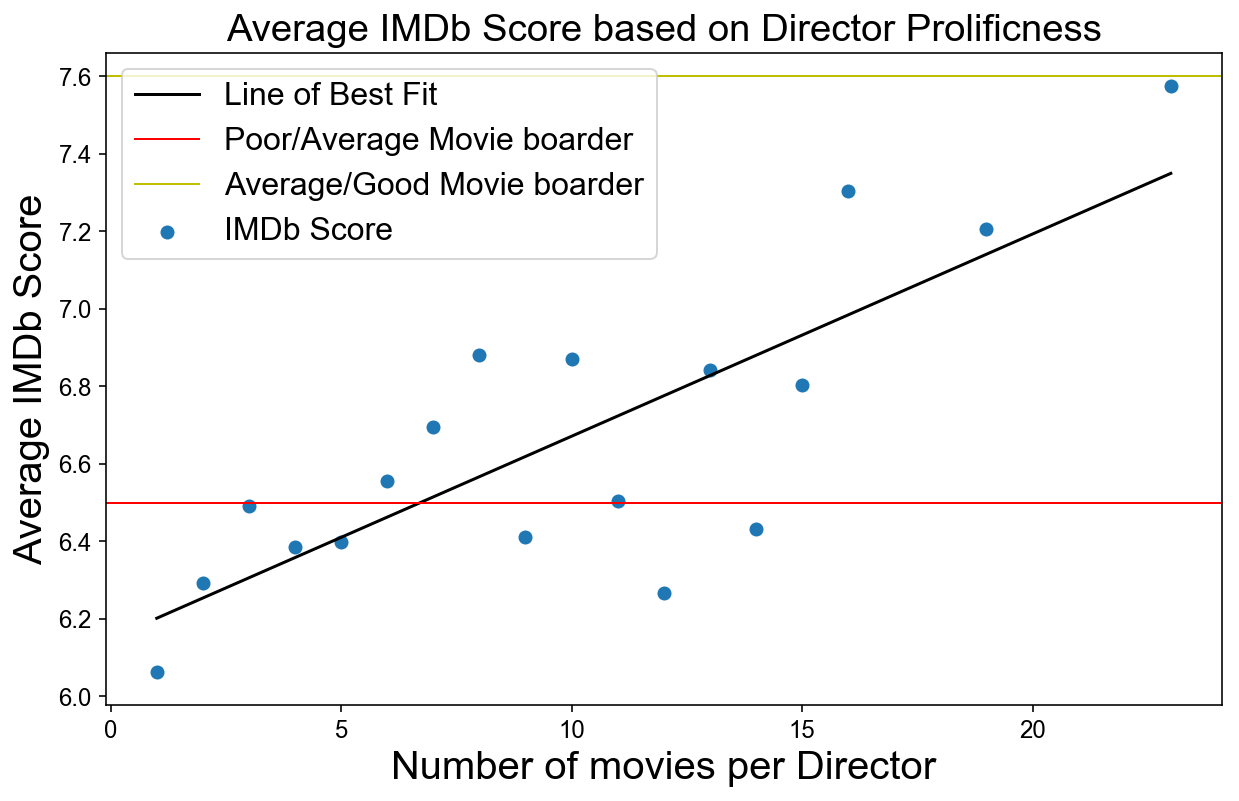

In [23]:
imdbScore = [df['imdb_score'].mean() for df in films_by_prolific.values()]

plt.scatter(keyList, imdbScore, label='IMDb Score')
plt.plot(np.unique(keyList), np.poly1d(np.polyfit(keyList, imdbScore, 1))
        (np.unique(keyList)), color='k', label='Line of Best Fit')
plt.axhline(y=poor_avg, linewidth=1, color = 'r', label="Poor/Average Movie boarder")
plt.axhline(y=avg_good, linewidth=1, color = 'y', label="Average/Good Movie boarder")
plt.xlabel('Number of movies per Director')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score based on Director Prolificness')
plt.legend(loc=2)
plt.show()

Finally, we wanted to see the average IMDb score based on the directors prolificness. The clear upward trend shows that directors with more movies typically have movies that perform better as a whole. There is also a surprising number of average scores under the 50$^{th}$ percentile.

Even with almost 1000 directors, the first-time directors (1 movie to their name) consistently score the lowest.

## References

IMDb +5000 Movie Dataset: https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset